# Model Building

In [69]:
import pandas as pd
import numpy as np
import pickle
import sklearn
import nltk
from time import time
from nltk.corpus import wordnet
from tqdm import tqdm_notebook as tqdm

#load data
features = np.load('features.npy')
labels = np.load('labels.npy')
X_train = np.load('X_train.npy')
y_train = np.load('y_train.npy')
X_test = np.load('X_test.npy')
y_test = np.load('y_test.npy')
indices_train = np.load('indices_train.npy')
indices_test = np.load('indices_test.npy')

df = pd.read_pickle('dt_clean.pkl')
category_id_df = pd.read_pickle('category_id_df.pkl')
with open('id_to_category.pickle', 'rb') as handle:
    id_to_category = pickle.load(handle)
with open('category_to_id.pickle', 'rb') as handle:
    category_to_id = pickle.load(handle)

Import ML Classifiers

In [70]:
#linear models
from sklearn.linear_model import LogisticRegression, SGDClassifier, Perceptron

#LDA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis

#SVM
from sklearn.svm import SVC, LinearSVC

#KNN
from sklearn.neighbors import KNeighborsClassifier

#GP
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF

#NAIVE BAYES
from sklearn.naive_bayes import MultinomialNB, GaussianNB

#DT
from sklearn.tree import DecisionTreeClassifier

#ENSEMBLE
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, VotingClassifier
    #BOOSTING
import xgboost

#NEURAL NETWORK
from sklearn.neural_network import MLPClassifier

from sklearn.model_selection import cross_val_score

# Cross Validation

In [56]:
clf1 = LogisticRegression(solver='lbfgs', max_iter=1000, multi_class='auto')
clf2 = LinearSVC()
clf3 = RandomForestClassifier()
models = [
    SGDClassifier(loss="hinge", penalty="elasticnet", max_iter=1000, tol=1e-3, n_jobs=-1),#did not use penalty 'l2'
    LogisticRegression(C=10, solver='lbfgs', max_iter=1000, multi_class='auto', n_jobs=-1),
    
    Perceptron(tol=1e-4, penalty=None, n_jobs=-1), #penalty='l2', tol=1e-2
    
    #other
    
    #LinearDiscriminantAnalysis(),
    #QuadraticDiscriminantAnalysis(),
    
    #SVC(C=0.025, gamma='scale'), 
    LinearSVC(C=20, max_iter=1000),
       
    #KNeighborsClassifier(n_neighbors=5), #expensive
    
    MultinomialNB(alpha=0.1),
    #GaussianNB(),
    
    ##DecisionTreeClassifier(max_depth=5),
    
    #RandomForestClassifier(n_estimators=100, n_jobs=-1, bootstrap= True), 
    #AdaBoostClassifier(), #AdaBoostClassifier                73.91       55.66       67.40
#    GradientBoostingClassifier(n_estimators=400, learning_rate=0.1, max_depth=5),   
#    VotingClassifier(estimators=[('lr', clf1), ('rndfr', clf3), ('svc', clf2)], voting='hard', weights=[2, 1, 2], n_jobs = -1),
#    xgboost.XGBClassifier(),
    
#    MLPClassifier(alpha=1),
    
    
    
    #optional
    #BernoulliNB(),   #BernoulliNB                   66.93       37.47       79.43       50.92            0.76s
    RidgeClassifier(max_iter=1000),
    PassiveAggressiveClassifier(max_iter=1000, loss= 'hinge', C=10, tol=1e-4, n_jobs=-1),
    NearestCentroid(),
    
]
CV = 20
cv_df = pd.DataFrame(index=range(CV * len(models)))
entries = []
with tqdm(total=len(models), desc='Progress') as pbar:
    for model in models:
        model_name = model.__class__.__name__
        accuracies = cross_val_score(model, features, labels, scoring='accuracy', cv=CV, n_jobs=-1)    
        for fold_idx, accuracy in enumerate(accuracies):
            entries.append((model_name, fold_idx, accuracy))
        print(model_name)
        pbar.update(1)
    
cv_df = pd.DataFrame(entries, columns=['model_name', 'fold_idx', 'accuracy'])

SGDClassifier
LogisticRegression
Perceptron
LinearSVC
MultinomialNB
RidgeClassifier
PassiveAggressiveClassifier
NearestCentroid



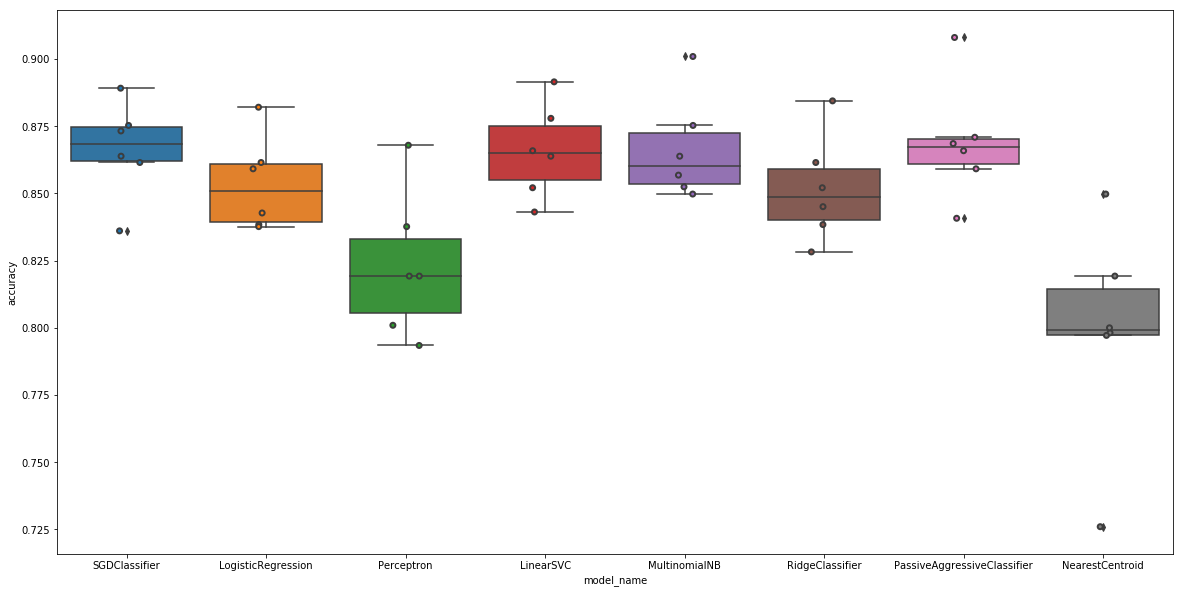

In [43]:
#ignore 'remove_na' warning from seaborn
from warnings import simplefilter
simplefilter(action='ignore', category=FutureWarning)

from matplotlib import pyplot
a4_dims = (20, 10)
fig, ax = pyplot.subplots(figsize=a4_dims)

import seaborn as sns
sns.boxplot(x='model_name', y='accuracy', data=cv_df)
sns.stripplot(x='model_name', y='accuracy', data=cv_df, 
              size=5, jitter=True, edgecolor="gray", linewidth=2, ax=ax)

In [19]:
cv_df.groupby('model_name').accuracy.mean().sort_values(ascending=False)

model_name
LinearSVC             0.866102
SGDClassifier         0.862571
LogisticRegression    0.814818
MultinomialNB         0.747862
Name: accuracy, dtype: float64

In [44]:
cv_df.groupby('model_name').accuracy.mean().sort_values(ascending=False)

model_name
PassiveAggressiveClassifier    0.868874
MultinomialNB                  0.866520
SGDClassifier                  0.866517
LinearSVC                      0.865730
LogisticRegression             0.853585
RidgeClassifier                0.851627
Perceptron                     0.823072
NearestCentroid                0.798384
Name: accuracy, dtype: float64

Neural Network

Implementing and tuning neural networks is a highly iterative process and includes many trials and errors. Even though neural network is a more complex version of logistic regression, it doesn’t always outperform logistic regression and other relevant classifiers, and sometimes with high dimension sparse data, logistic regression can deliver good performance with much less computation time than neural network.

# Classifier Selection

In [34]:
#########################################
#how to increase accuracy

In [35]:
#from sklearn import model_selection, preprocessing, linear_model, naive_bayes, metrics, svm
#from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
#from sklearn import decomposition, ensemble

#import pandas, xgboost, numpy, textblob, string
#from keras.preprocessing import text, sequence
#from keras import layers, models, optimizers

In [36]:
#embedding_matrix = pickle.load(open('embedding_matrix.npy', 'rb'))
#word_index = pickle.load(open('word_index.npy', 'rb'))

In [71]:
from sklearn.naive_bayes import MultinomialNB, BernoulliNB
from sklearn.linear_model import RidgeClassifier
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.neighbors import NearestCentroid

Models

In [72]:
clf1 = LogisticRegression(C=10, solver='lbfgs', max_iter=100, multi_class='auto', n_jobs=-1)
clf2 = LinearSVC(C=10)
clf3 = RandomForestClassifier()
models = [
    SGDClassifier(loss="hinge", penalty="elasticnet", max_iter=1000, tol=1e-3, n_jobs=-1),#did not use penalty 'l2'
    LogisticRegression(C=10, solver='lbfgs', max_iter=1000, multi_class='auto', n_jobs=-1),
    
    Perceptron(tol=1e-4, penalty=None, n_jobs=-1), #penalty='l2', tol=1e-2
    
    #other
    
    #LinearDiscriminantAnalysis(),
    #QuadraticDiscriminantAnalysis(),
    
    #SVC(C=0.025, gamma='scale'), 
    LinearSVC(C=20, max_iter=1000),
       
    #KNeighborsClassifier(n_neighbors=5), #expensive
    
    MultinomialNB(alpha=0.1),
    #GaussianNB(),
    
    ##DecisionTreeClassifier(max_depth=5),
    
    #RandomForestClassifier(n_estimators=100, n_jobs=-1, bootstrap= True), 
    #AdaBoostClassifier(), #AdaBoostClassifier                73.91       55.66       67.40
#    GradientBoostingClassifier(n_estimators=400, learning_rate=0.1, max_depth=5),   
#    VotingClassifier(estimators=[('lr', clf1), ('rndfr', clf3), ('svc', clf2)], voting='hard', weights=[2, 1, 2], n_jobs = -1),
#    xgboost.XGBClassifier(),
    
#    MLPClassifier(alpha=1),
    
    
    
    #optional
    #BernoulliNB(),   #BernoulliNB                   66.93       37.47       79.43       50.92            0.76s
#@    RidgeClassifier(max_iter=1000),
    PassiveAggressiveClassifier(max_iter=1000, loss= 'hinge', C=10, tol=1e-4, n_jobs=-1),
#@    NearestCentroid(),
    
]

In [73]:
from sklearn.metrics import accuracy_score, confusion_matrix
def train_model(classifier, X_train, y_train, X_test, y_test, is_neural_net=False):
    # fit the training dataset on the classifier
    classifier.fit(X_train, y_train)
    
    # predict the labels on validation dataset
    predictions = classifier.predict(X_test)
    
    if is_neural_net:
        predictions = predictions.argmax(axis=-1)
        
    cm = confusion_matrix(y_test, predictions)
    recall = np.diag(cm) / np.sum(cm, axis = 1)
    precision = np.diag(cm) / np.sum(cm, axis = 0)
    
    result = []
    result.append(predictions)
    result.append(np.mean(recall))
    result.append(np.mean(precision))
    
    return result

Accuracies

In [74]:
model = ['Model']
accuracy = ['Accuracy']
precision = ['Precision']
recall = ['Recall']
train_time = ['Train Time']
with tqdm(total=len(models), desc='Progress') as pbar:
    for classifier in models:
        print((classifier.__class__.__name__).ljust(32), end = ' ')
        t = time()
        res = train_model(classifier, X_train, y_train, X_test, y_test)
        t = time() - t
        model.append(classifier.__class__.__name__)
        accuracy.append(accuracy_score(res[0], y_test)*100)
        precision.append(res[2]*100)
        recall.append(res[1]*100)
        train_time.append(t)
        print('   Done',end=' ')
        print(f"         time - {t}s")
        pbar.update(1)
matrix = []
matrix.append(model)
matrix.append(accuracy)
matrix.append(recall)
matrix.append(precision)
matrix.append(train_time)
matrix_r=np.array(matrix)
matrix_r=matrix_r.transpose()


SGDClassifier                       Done          time - 33.09852433204651s
LogisticRegression                  Done          time - 269.2293817996979s
Perceptron                          Done          time - 6.277412414550781s
LinearSVC                           Done          time - 1.538278341293335s
MultinomialNB                       Done          time - 0.4485158920288086s
PassiveAggressiveClassifier         Done          time - 11.838734865188599s



In [41]:
def f1score(p, r):
    return float(2*(float(p)*float(r))/(float(p)+float(r)))
dash = '-' * 88
data = matrix_r
for i in range(len(data)):
    if i == 0:
      print(dash)
      print('{:<27s}{:^12s}{:^13s}{:^12s}{:^12s}{:^12s}'.format(data[i][0],data[i][1],data[i][2],data[i][3], "F1 Score", data[i][4]))
      print(dash)
    else:
      print('{:<27s}{:^12.2f}{:^12.2f}{:^12.2f}{:^12.2f}{:>12.2f}s'.format(data[i][0],float(data[i][1]),float(data[i][2]),float(data[i][3]), f1score(data[i][3],data[i][2]), float(data[i][4])))

----------------------------------------------------------------------------------------
Model                        Accuracy     Recall     Precision    F1 Score   Train Time 
----------------------------------------------------------------------------------------
SGDClassifier                 88.42       75.81       90.22       82.39           10.52s
LogisticRegression            88.89       78.05       92.75       84.76           71.48s
Perceptron                    88.11       76.39       91.68       83.34            1.61s
LinearSVC                     89.67       81.56       91.35       86.18            0.58s
MultinomialNB                 89.36       81.30       89.79       85.33            0.17s
RidgeClassifier               88.73       76.91       93.20       84.28            1.39s
PassiveAggressiveClassifier   88.42       78.66       89.95       83.93            1.77s
NearestCentroid               83.72       84.40       77.39       80.74            0.43s


In [75]:
def f1score(p, r):
    return float(2*(float(p)*float(r))/(float(p)+float(r)))
dash = '-' * 88
data = matrix_r
for i in range(len(data)):
    if i == 0:
      print(dash)
      print('{:<27s}{:^12s}{:^13s}{:^12s}{:^12s}{:^12s}'.format(data[i][0],data[i][1],data[i][2],data[i][3], "F1 Score", data[i][4]))
      print(dash)
    else:
      print('{:<27s}{:^12.2f}{:^12.2f}{:^12.2f}{:^12.2f}{:>12.2f}s'.format(data[i][0],float(data[i][1]),float(data[i][2]),float(data[i][3]), f1score(data[i][3],data[i][2]), float(data[i][4])))

----------------------------------------------------------------------------------------
Model                        Accuracy     Recall     Precision    F1 Score   Train Time 
----------------------------------------------------------------------------------------
SGDClassifier                 75.97       67.17       70.00       68.56           33.10s
LogisticRegression            75.32       63.71       71.32       67.30          269.23s
Perceptron                    71.45       61.41       70.87       65.80            6.28s
LinearSVC                     75.58       65.82       69.32       67.52            1.54s
MultinomialNB                 73.77       61.52       72.19       66.43            0.45s
PassiveAggressiveClassifier   71.58       60.77       67.00       63.73           11.84s


# Training Model

Text(0.5, 15.0, 'Predicted')

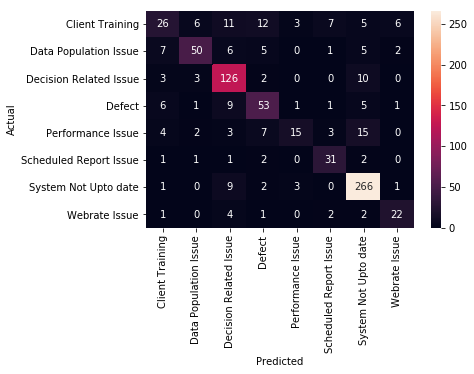

In [76]:
modell = SGDClassifier(loss="hinge", penalty="elasticnet", max_iter=1000, tol=1e-3, n_jobs=-1)
model = SGDClassifier(loss="hinge", penalty="elasticnet", max_iter=1000, tol=1e-3, n_jobs=-1)
modell.fit(X_train, y_train)
y_pred = modell.predict(X_test)
#model.fit(features, labels)
pickle.dump(model, open('model.sav', 'wb'))

from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

conf_mat = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_mat, annot=True, fmt='d', xticklabels=category_id_df.category.values, yticklabels=category_id_df.category.values)
plt.ylabel('Actual')
plt.xlabel('Predicted')

In [77]:
#see errors
from IPython.display import display

for predicted in category_id_df.category_id:
  for actual in category_id_df.category_id:
    if predicted != actual and conf_mat[actual, predicted] >= 2:
      print("'{}' predicted as '{}' : {} examples.".format(id_to_category[actual], id_to_category[predicted], conf_mat[actual, predicted]))
      display(df.loc[indices_test[(y_test == actual) & (y_pred == predicted)]][['title', 'content']])
      print('')

'Data Population Issue' predicted as 'Client Training' : 7 examples.


title                                            content
752        Kim Wheeler  tiagi the hotel is showing some discrepancies ...
702       Meghan Price  we are showing to have several thousand hahaha...
523       Franz Rudolf  good afternoon we have a difference in busines...
482  Debbie Selvarajoo  there are several market segments forecast gro...
582     Marie Dahimene  hello ideas team i can notice a serious discre...
600     Crystal Seamon  under business analysis data details the numbe...
550           Rick Shi  the total of each segment group doesnt match t...


'Decision Related Issue' predicted as 'Client Training' : 3 examples.


title                                            content
1351  Doreen Leithold  dear team please help i can not find the error...
1204        Lori Conn  i have updated my pricing configuration with a...
852      Alina Marcut  good morning hope my email finds you well i ha...


'Defect' predicted as 'Client Training' : 6 examples.


title                                            content
1903   Laureen Chialli  hello care team happy monday i have an issue w...
1712          Gary Tay  dear care team i could not add seasonal date i...
1914  Jim Burgemeestre  in the attached print screen is listed between...
1866    Charly Bruneau  hello since the new version of rms came up i n...
1596  Katja Schildmann  we receive an alert stating unassigned market ...
1632         Eva Stach  dear team i want to change my price strategy c...


'Performance Issue' predicted as 'Client Training' : 4 examples.


title                                            content
2153  Kathrin Swadzba  hi there i am trying to upload the attached ma...
1970    Jodi O'Connor  team this site generates the attached error no...
1980     Karen Cahoon  hello user is receiving the error message the ...
1949          Dia Son  dear care team need your kind assistance i hav...


'Client Training' predicted as 'Data Population Issue' : 6 examples.


title                                            content
174          Scott Griffin  there is a significant variance in stly and la...
285            Kim Wheeler  phlpm please see the attached data extraction ...
21            Silvia Bueno  if i go to at a glace summary there isnt any i...
347         Marie Lidstrom  something has happened with the occupancy for ...
105  Sarah Kalin Churchill  there is a discrepancy in the rooms on the boo...
340           Michael Dent  hello i have found serious data discrepancies ...


'Decision Related Issue' predicted as 'Data Population Issue' : 3 examples.


title                                            content
1438  Marina Furlan  dear team could you please check the overbooki...
1490   Todd Hoeltke  since going live in our inventory in sabre is ...
975     Dirk Runkel  dear support team i recognized a data discrepa...


'Performance Issue' predicted as 'Data Population Issue' : 2 examples.


title                                            content
1965  Marie Lundkvist  dear sirs i tried to create forecast groups in...
2082       Ryan Kibel  otb data for yesterday april is extremely off ...


'Client Training' predicted as 'Decision Related Issue' : 11 examples.


title  \
271          Micheal Stapleton   
324               Yatika Madan   
360               Eric Henning   
216  Violetta Romero De Torres   
129              Ashley Kenaga   
44              Brittany Jones   
25                Karen Cahoon   
301              Claire Lawler   
336             Maria Villacis   
153            Deepen Maharana   
366    Pierre Baptiste Lechien   

                                               content  
271  dear team following the cases opened by jane j...  
324  kindly note we are unable to save upload rates...  
360  can you check our set up it seems that ideas i...  
216  hello the issue is related to double occupancy...  
129  it is not letting me upload my overrides the u...  
44   boscb has a bar hierarchy alert with no date r...  
25   client ran the market segment mapping report r...  
301  good afternoon we have had a recurring issue i...  
336  hello ideas team we updated yesterday our mini...  
153  hello team could you please look into the belo...  
366  dear care team the property is live since this...


'Data Population Issue' predicted as 'Decision Related Issue' : 6 examples.


title                                            content
758  Bastien Chapel  dear support please provide back up of the ema...
564   Steven Lerner  kgld has an unconfigured room type pool showin...
543  Tomas Suchanek  good afternoon as previously mentioned i can s...
443    Audrey Saade  dear support team we are finding discrepancies...
645   Kyle Strachan  hello further to case i am seeing more dates w...
534  Tomas Suchanek  good morning can you please send me the data f...


'Defect' predicted as 'Decision Related Issue' : 9 examples.


title                                            content
1676  Matthieu Lafaurie  hello opening a case because this property has...
1753      Mauro Malizia  dear team i have got a decision upload failed ...
1584   Melanie Harsteln  dear team i set the rates prombb and promah on...
1852         Alex Price  good morning for some reason our posting maste...
1593      Jodi O'Connor  hi team we collapsed the two room classes toda...
1545        Ian Harwood  hi ian can i ask you to take a look at the att...
1779     Teri Sigurdson   ts this hotel experienced an issue with decis...
1724        Diala Tabet  dear team kindly assist clearing the revenue o...
1711     Rohit Kaduskar  i have a quick question doubt regardig the old...


'Performance Issue' predicted as 'Decision Related Issue' : 3 examples.


title                                            content
1943  Aymeric ERULIN  hello guys can you please resend the decision ...
2045  Rohit Kaduskar  hi rohit have you had other cases of this we s...
2080    Pricing Team  hello i hope to find you well i have a questio...


'System Not Upto date' predicted as 'Decision Related Issue' : 9 examples.


title                                            content
3669       Vincent Duvillet  dear ideas care team i hope you are doing well...
2640       Carolina Machado  oxi interface with opera pms is showing a lot ...
2661          Mauro Malizia  hello team this property was by mistake switch...
3693         Marie Dahimene  hello novotel liverpool has been out of sync f...
3200  Heribert Perez Garcia  dear team the last optimisation for coworth pa...
2358          Steven Dickey  please unlock coch iit is locked due to an err...
3203          Jessica Muise  hello the system has been in decision delivery...
2454       Jason Montgomery  hi can you please look into the decision file ...
3387            Marko Kokko  helo both hotels has not updated decision uplo...


'Webrate Issue' predicted as 'Decision Related Issue' : 4 examples.


title                                            content
3720  Tuhin Jayasenan  hi team i want to know if ota insight has been...
3773  Rajat Manchanda  dear team the decisions are not flowing in to ...
3854    Randy Holcomb  the rate shoppingcomp set pricing is not worki...
3857   Federica Gallo  dear all i worked in the mapping in optima in ...


'Client Training' predicted as 'Defect' : 12 examples.


title                                            content
215       Kim Wheatley  for nyctr on the pricing management screen the...
402       Amber Revier  my client with four seasons boston reported an...
171     Tammy Mohundro  on property user was able to action and clear ...
93    Sebastian Schulz  dear careteam we wont to change the room class...
194     Ranja Eloranta  business analysis graph is really strange if l...
111         Ryan Kibel  we are not able to update the vendor mapping d...
311  Debbie Selvarajoo  went live yesterday having issues today with s...
43    Carolina Machado  im not able to create a notification next butt...
164     Michael Walton  hi following the latest service pack release t...
177      Fahad Abukari  groups on the books for june is being mapped i...
344   Katja Schildmann  system triggered alert for a new room type bkn...
75           Rick Chen  the user is trying to map the unmapped the ms ...


'Data Population Issue' predicted as 'Defect' : 5 examples.


title                                            content
658     Kim Wheeler  mspei we are not seeing a reservation in gro f...
747     Maxime Prin  hello i noticed an issue with market segments ...
649   Caitlin Neary  hello team im currently comparing the january ...
619    Karen Tamayo  i have noticing mktdeffut showing up for a few...
584  Aymeric ERULIN  hello guys i have an issue in business insight...


'Decision Related Issue' predicted as 'Defect' : 2 examples.


title                                            content
905   Matthieu Lafaurie  hello season gap error message which is a know...
1370        Jill Forbes  good afternoon as per notes on case i have ope...


'Performance Issue' predicted as 'Defect' : 7 examples.


title                                            content
1923      Pawel Guminski  urgent i have attached error showing when i am...
2039         Maxime Prin  dear team there is an error message appearing ...
2139      Abhishek Kumar  we have tried making below changes but are get...
2093    Elizabeth Kortum  when trying update pricing today for dc i rece...
2089        Marine Baron  hi i never receive alerts exceptions and notif...
2161  Jenna Lohi Peltola  hi why have my hotels disappeared from the pro...
2138        Silvia Bueno  good morning when we try to write an override ...


'Scheduled Report Issue' predicted as 'Defect' : 2 examples.


title                                            content
2187     Masha DJACIC  hello in pricing pace report nothing is showin...
2180  Quineth Mahoney  hi ideas team in when i click on the reports e...


'System Not Upto date' predicted as 'Defect' : 2 examples.


title                                            content
2822        Sam Keyte  hello there our system is not uptodate today p...
3392  Juliana Mendoza  attn michel as discussed we have an alert for ...


'Client Training' predicted as 'Performance Issue' : 3 examples.


title                                            content
15   Micheal Stapleton  hi care we are having issues running group eva...
396     John Albertsen  hello i am unable to run a new group evaluatio...
256          Tony Long  user jason dusenberry jasondusenberryhiltoncom...


'System Not Upto date' predicted as 'Performance Issue' : 3 examples.


title                                            content
3389         Linda Yu                     bde is not happening for today
2565    Jacelyn Chong  hi there this is frustrating that we cannot ac...
2709  Vincent Leblanc  we were having issues with our network it just...


'Client Training' predicted as 'Scheduled Report Issue' : 7 examples.


title                                            content
163        Jane Jordan  hi i have pulled a data extract attached from ...
172  Debbie Selvarajoo  i am not able to generate a monthly scheduled ...
277     Maria Villacis  dear team appreciate if you can help us as we ...
288        Claude Dery  i am unable to remove serra skedden from the d...
27     Yannic Hoffmann  dear team i try to set up some reports to be s...
162        Jane Jordan  hi i have pulled a data extract attached from ...
96          Ryan Kibel  a report has been scheduled to be sent each mo...


'Performance Issue' predicted as 'Scheduled Report Issue' : 3 examples.


title                                            content
1928  Daniel Klages  dear team unfortunately i am not able to gener...
2105  Steven Dickey  when preparing a data extraction report to exp...
2037  Joseph Bustos  i am unable to pull up up the data extraction ...


'Webrate Issue' predicted as 'Scheduled Report Issue' : 2 examples.


title                                            content
3732      Malika Amer-Ouali  hello monday morning i had an alert that the r...
3851  Nicklas Lundby Olesen  hi i dont recieve my rateshopping and ive cont...


'Client Training' predicted as 'System Not Upto date' : 5 examples.


title                                            content
350  Yannick Boutin  dear support team same time last year seems to...
30    Jodi O'Connor  hi care team please see the attached email fro...
218   Franck DJEUDA  hi the hotel had no pace since today could you...
50     Franz Rudolf  good morning we currently have no rights to sa...
127         Dia Son  dear care team need your kind assistance for t...


'Data Population Issue' predicted as 'System Not Upto date' : 5 examples.


title                                            content
640  Micheal Stapleton  property has not been optimised since yesterda...
440      Daniel Klages  dear team could you please check if you receiv...
738      Tavis Ishmael  same time last year data is missing again last...
723   Heike Runde Mrs.  hello and good morning the hotel had a big pro...
616       Marine Baron  hi it seems that i had adjustments of room can...


'Decision Related Issue' predicted as 'System Not Upto date' : 10 examples.


title                                            content
1131    Sheetal Varia  not sure what to log this under when we went l...
1312    Anne Schwarze  dear colleagues we have a problem in some hote...
1165  Quineth Mahoney  hi care team i have not been able to use the s...
1354    Zephyr Gentry  system has been uploading decisions since loca...
928      Alina Marcut  morning hotel is not up to date due to a techn...
1355    Zephyr Gentry  system has been uploading decisions since loca...
1080     Franz Rudolf  good morning i was working on the strategies a...
1356    Zephyr Gentry  system has been uploading decisions since loca...
1376  Deepen Maharana  hello team please refer to the attached email ...
1088     Oriane Serre  good morning i hope you are doing well i got a...


'Defect' predicted as 'System Not Upto date' : 5 examples.


title                                            content
1660       Meg Oldham  hi i am trying to update to be available for a...
1656   Rohit Kaduskar  can you check again with care in regards to th...
1763    Vianney Fajon  hello i have configured business view for this...
1595  Nicolas St-Yves  good day over the weekend we switched over to ...
1622     Karen Tamayo  i am only able to see hilton properties curren...


'Performance Issue' predicted as 'System Not Upto date' : 15 examples.


title                                            content
2070     Emil Liljedahl  hi system is locked currently and has been for...
2114  Micheal Stapleton                           system is in lock since 
2006        Jane Jordan  hi staycity segar high road have been in read ...
1990       Franz Rudolf  good morning i tried to followup a notificatio...
2046     Aymeric ERULIN  hello guys my hotel is in read only mode and n...
2023      Joseph Bustos               the hotel is stuck in read only mode
2012      Joseph Bustos     the hotel is stuck in read only mode thank you
2133        Rita SOARES  good morning the system is not working properl...
1948  Riccardo Belfiore  hello there the system has been in read only m...
2122        Dirk Runkel  dear support team it is really annoying that t...
2001         Alise Deeb  it is am and the system is still locked for pr...
1966        Katja Engel  hello unfortunately i am in read only mode i t...
1986     Pawel Guminski  hello i have noticed an error this morning ple...
1962   Heike Runde Mrs.  good morning system is looked after i have don...
1956       Franz Rudolf  good morning exactly the same issue with unass...


'Scheduled Report Issue' predicted as 'System Not Upto date' : 2 examples.


title                                            content
2193  Tuhin Jayasenan  hi team with the reports is it not possible to...
2275      Haley Maltz  hi we need assistance with modifying a schedul...


'Webrate Issue' predicted as 'System Not Upto date' : 2 examples.


title                                            content
3835  Ramesh Bindroo  hi team will you please review the attached em...
3796    Fiona Hickey  edinburgh has been locked for some time now ca...


'Client Training' predicted as 'Webrate Issue' : 6 examples.


title                                            content
130        Franz Rudolf  good morning ive some discrepancies in my sche...
152        Rebecca Bach  dear careteam we have notified that there is n...
286         Sean Driver  hello i am trying to recreate the attached rep...
409   Christelle Quaren  bonjour i have a new room type create into my ...
234      Caroline Faber  hi there our competitor pricing is not coming ...
387  Veli-Petteri Korpi  hi rate shopping configuration competitor sett...


'Data Population Issue' predicted as 'Webrate Issue' : 2 examples.


title                                            content
436   Jodi O'Connor  hi care team there seems to be discrepancies b...
451  Petra Gneipelt  dear team i have added a new comptitor to the ...